In [8]:
import torch.version
from vit import ViT, InputEmbedding, EncoderBlock
import einops
from pathlib import Path
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, RandomHorizontalFlip, RandomCrop
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#from config import get_config, latest_weights_file_path
#from train import get_model, get_ds, run_validation
#from translate import translate

print(torch.__version__)

2.4.1+cu124


In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [38]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [52]:
def predict(model, input, target, classes):
  model.eval()
  with torch.no_grad():
    predictions = model(input.unsqueeze(0))
     # Tensor (1, 10) -> [ [0.1, 0.01, ..., 0.6] ]
    predicted_index = predictions[0].argmax(0)
    predicted = classes[predicted_index]
    expected = classes[target]
    print(predictions)
  return predicted, expected
  

In [45]:
import torch.utils

filepath = Path('.')

transform_training_data = Compose(
    [RandomCrop(32, padding=4), Resize((224)), RandomHorizontalFlip(), ToTensor(), Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))]
    )

validation_data = torchvision.datasets.CIFAR10(
  root=filepath, train=False, download=False, transform=transform_training_data)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71453285..1.4542255].


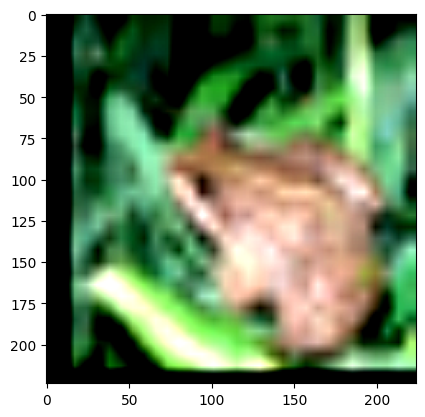

tensor([[ 0.0280, -0.0416,  0.0453,  0.0218,  0.0003,  0.0636, -0.0643, -0.0364,
          0.0581, -0.0731]], device='cuda:0')
Predicted: 'dog', Expected: 'frog'


In [53]:
 # load back the model
loaded_model = ViT().to(device) if torch.cuda.is_available() else ViT()

if torch.cuda.is_available():
  loaded_model.load_state_dict(torch.load('my_model2.pth', weights_only=True))
else:
  loaded_model.load_state_dict(torch.load('my_model2.pth', map_location=torch.device('cpu'), weights_only=True),strict=False)
# get a sample from the validation dataset for inference
input, target = validation_data[4][0], validation_data[4][1]

imshow(torchvision.utils.make_grid(input))
predicted, expected = predict(loaded_model, input, target, classes)

print(f"Predicted: '{predicted}', Expected: '{expected}'" )